In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import networkx as nx
from scipy.stats import pearsonr

# machine lerning
from sklearn.model_selection import cross_validate
from sklearn.ensemble import GradientBoostingRegressor

# Role Importance Analysis

In [4]:
#Load data
df = pd.read_csv('../Data/preprocessed_data/final_data/full_db.csv')

columns_to_keep = ['name', 'avg_order_0','std_order_0','avg_order_1','std_order_1','avg_order_2','std_order_2','success']
df = df[columns_to_keep]
full_df = df.rename(columns={'name': 'Name', 'avg_order_0': 'avg_role_0', 'std_order_0': 'std_role_0', 'avg_order_1': 'avg_role_1', 'std_order_1': 'std_role_1', 'avg_order_2': 'avg_role_2', 'std_order_2': 'std_role_2'})
full_df.sort_values(by=['success'], ascending=False)

,Name,avg_role_0,std_role_0,avg_role_1,std_role_1,avg_role_2,std_role_2,success
5185,Nicolas Cage,3.708333,9.510867,5.875000,15.274468,2.171875,7.855242,2.252450
2135,Leonardo DiCaprio,3.400000,6.039868,4.744186,6.857666,NaN,NaN,2.165815
5186,Tom Hanks,2.916667,8.072157,6.191489,11.038883,10.081081,24.907264,2.093282
6126,Gary Oldman,1.769231,2.886410,3.448276,3.710063,7.549020,13.811495,2.063533
2168,Scarlett Johansson,5.964286,17.157843,6.340000,11.129438,NaN,NaN,2.043450
...,...,...,...,...,...,...,...,...
2129,Ahney Her,29.000000,26.608269,NaN,NaN,NaN,NaN,0.311359
2131,Tara Macken,33.500000,31.815877,NaN,NaN,NaN,NaN,0.293505
2132,Harry Holland,47.750000,20.716841,NaN,NaN,NaN,NaN,0.244641
2133,Dale Pavinski,54.666667,68.265820,NaN,NaN,NaN,NaN,0.193497


In [8]:
avg_role_beginning = full_df['avg_role_0']
avg_role_mid = full_df['avg_role_1'].dropna()
avg_role_end = full_df['avg_role_2'].dropna()


std_role_beginning = full_df['std_role_0']
std_role_mid = full_df['std_role_1'].dropna()
std_role_end = full_df['std_role_2'].dropna()

success_beginning = full_df['success'] # Success of actors who had a begginning career (No NaN in avg_role_0)
success_mid = full_df[~full_df['avg_role_1'].isna()]['success'] # Success of actors who had a mid career (No NaN in avg_role_1)
success_end = full_df[~full_df['avg_role_2'].isna()]['success'] # Success of actors who had a end career (No NaN in avg_role_2)

assert len(avg_role_beginning) == len(std_role_beginning) == len(success_beginning)
assert len(avg_role_mid) == len(std_role_mid) == len(success_mid)
assert len(avg_role_end) == len(std_role_end) == len(success_end)


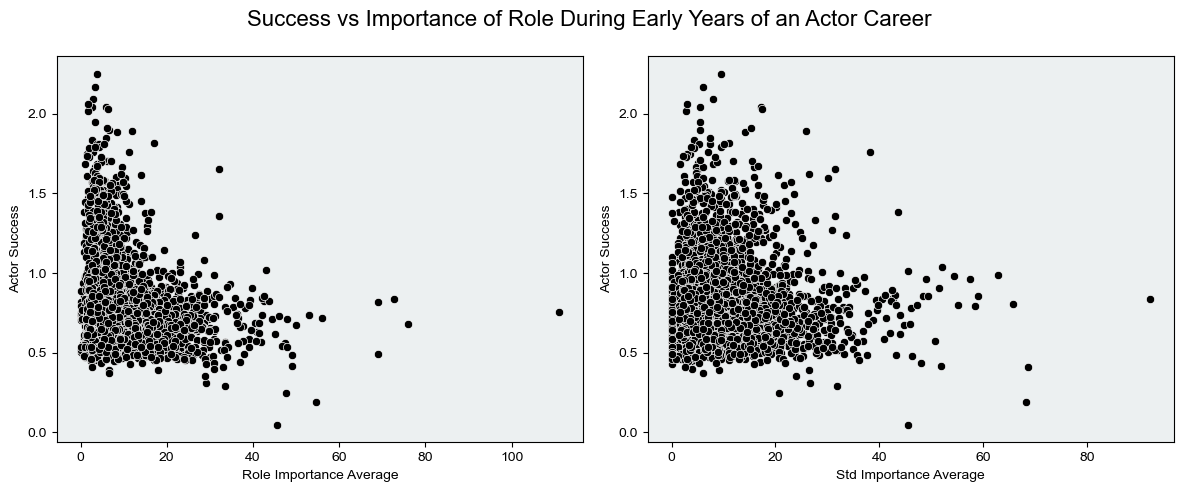

In [9]:
fig1, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
fig1.suptitle('Success vs Importance of Role During Early Years of an Actor Career ', fontsize=16)
# Flatten the 3 by 2 array of subplots into a 1D array for easier indexing
axes = axes.flatten()
sns.set_theme()
light_blue = '#ECF0F1'
light_green = '#D5F5E3'
light_yellow = '#FFFFE0'
# Set Seaborn style
sns.set(style="whitegrid")

# Plot 1: Success vs Role Average
sns.scatterplot(x=avg_role_beginning, y=success_beginning, ax=axes[0],  color='black')
axes[0].set_xlabel('Role Importance Average')
axes[0].set_ylabel('Actor Success')
axes[0].set_facecolor(light_blue)


# Plot 2: Success vs Role Standard Deviation
sns.scatterplot(x=std_role_beginning, y=success_beginning, ax=axes[1], color='black')
axes[1].set_xlabel('Std Importance Average')
axes[1].set_ylabel('Actor Success')
axes[1].set_facecolor(light_blue)


plt.tight_layout()
plt.show()

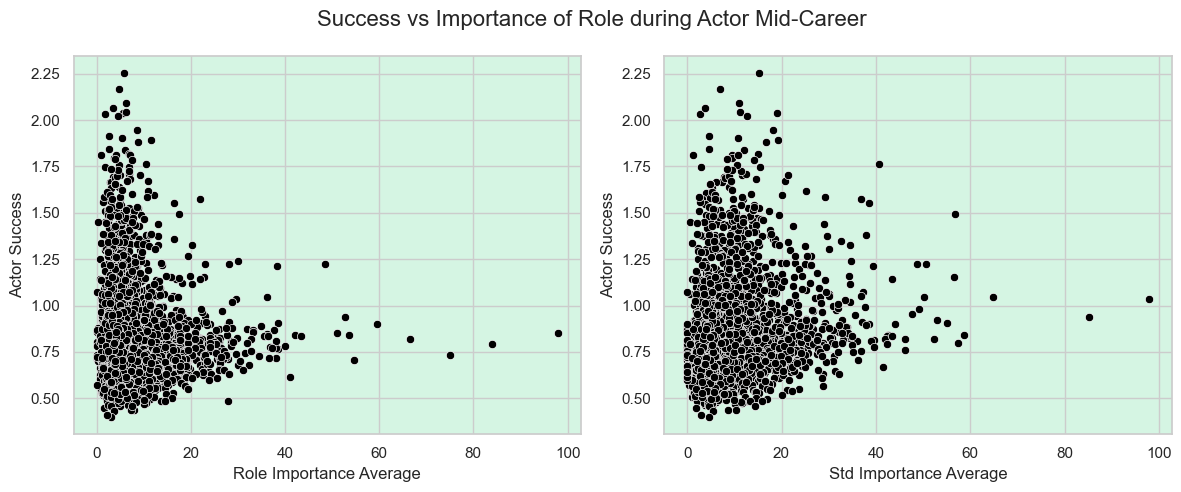

In [10]:
fig1, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
fig1.suptitle('Success vs Importance of Role during Actor Mid-Career', fontsize=16)
axes = axes.flatten()
sns.set_theme()
sns.set(style="whitegrid")

# Plot 1: Success vs Role Average
sns.scatterplot(x=avg_role_mid, y=success_mid, ax=axes[0], color='black')
axes[0].set_xlabel('Role Importance Average')
axes[0].set_ylabel('Actor Success')
axes[0].set_facecolor(light_green)

# Plot 2: Success vs Role Standard Deviation
sns.scatterplot(x=std_role_mid, y=success_mid, ax=axes[1], color='black')
axes[1].set_xlabel('Std Importance Average')
axes[1].set_ylabel('Actor Success')
axes[1].set_facecolor(light_green)

plt.tight_layout()
plt.show()


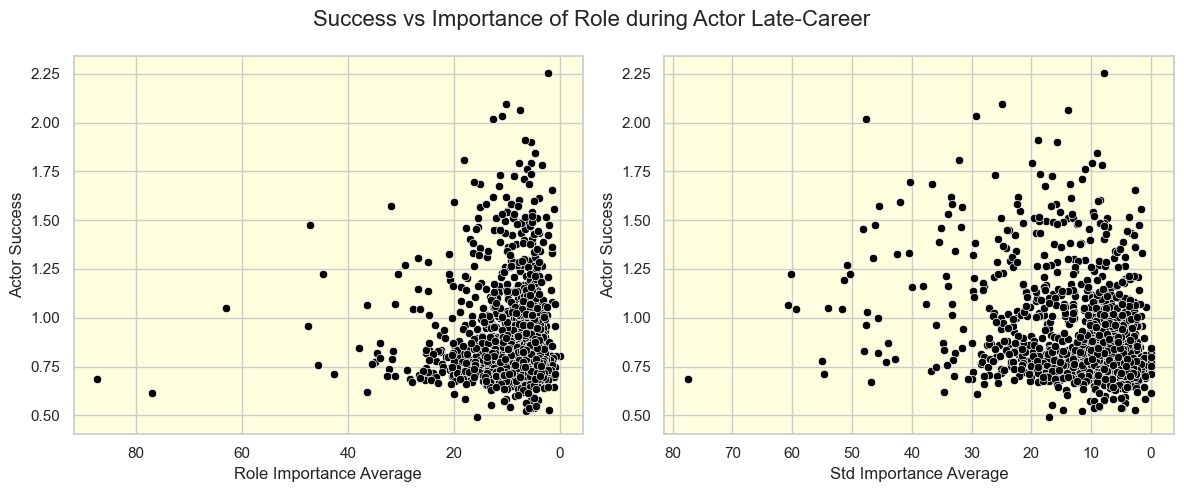

In [11]:

fig1, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
fig1.suptitle('Success vs Importance of Role during Actor Late-Career', fontsize=16)
axes = axes.flatten()
sns.set_theme()
sns.set(style="whitegrid")

sns.scatterplot(x=avg_role_end, y=success_end, ax=axes[0], color='black')
axes[0].set_xlabel('Role Importance Average')
axes[0].set_ylabel('Actor Success')
axes[0].set_facecolor(light_yellow)

# Plot 2: Success vs Role Standard Deviation
sns.scatterplot(x=std_role_end, y=success_end, ax=axes[1], color='black')
axes[1].set_xlabel('Std Importance Average')
axes[1].set_ylabel('Actor Success')
axes[1].set_facecolor(light_yellow)

# Flip the x-axis so that the highest average role importance is on the left
axes[0].invert_xaxis()
axes[1].invert_xaxis()

plt.tight_layout()
plt.show()

## Hypothesis testing: Pearson Correlation

p-value average: [1.15088755e-21 7.82421588e-03 6.37455519e-01]
p-value standard deviation: [3.77874687e-09 8.88037494e-44 8.49131333e-33]


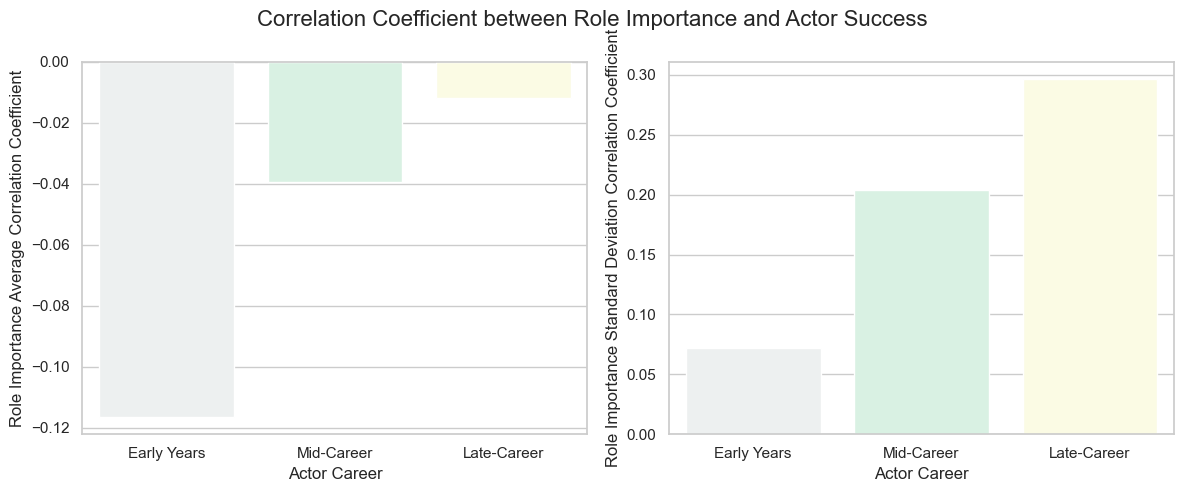

In [13]:
# Role importance Averages
cc_av=np.zeros(3)
p_av=np.zeros(3)
cc_av[0], p_av[0] = pearsonr(avg_role_beginning, success_beginning) # Early Years
cc_av[1], p_av[1] = pearsonr(avg_role_mid, success_mid) # Mid-Career
cc_av[2], p_av[2] = pearsonr(avg_role_end, success_end) # Late-Career 

# Role Importance Standard deviation
cc_std=np.zeros(3)# Correlation Coefficient
p_std=np.zeros(3) # Pvalue
cc_std[0], p_std[0] = pearsonr(std_role_beginning, success_beginning) # Early Years
cc_std[1], p_std[1] = pearsonr(std_role_mid, success_mid) # Mid-Career
cc_std[2], p_std[2] = pearsonr(std_role_end, success_end) # Late-Career 

print("p-value average:", p_av)
print("p-value standard deviation:", p_std)

# Plotting the correlation coefficient
fig1, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
fig1.suptitle('Correlation Coefficient between Role Importance and Actor Success', fontsize=16)
axes = axes.flatten()
sns.set_theme()
sns.set(style="whitegrid")

# Plot 1: Success vs budget Average

palette = sns.color_palette("light:#5A9")
palette = [light_blue, light_green, light_yellow]

sns.barplot(x=['Early Years', 'Mid-Career', 'Late-Career'], y=cc_av, ax=axes[0], palette=palette)

axes[0].set_xlabel('Actor Career')
axes[0].set_ylabel('Role Importance Average Correlation Coefficient')

# Plot 2: Success vs budget Standard Deviation
sns.barplot(x=['Early Years', 'Mid-Career', 'Late-Career'], y=cc_std, ax=axes[1], palette=palette)
axes[1].set_xlabel('Actor Career')
axes[1].set_ylabel('Role Importance Standard Deviation Correlation Coefficient')

plt.tight_layout()
plt.show()


## Regression Analysis: Gradient Boosting Regression

In [25]:
def numpy_helper(df, cols):
    new_array = df[cols].values.astype(float)
    return new_array

In [38]:
# instead of accuracy, precision and recall (more used for classification), use MSE (Mean Square Error) and R-squared

# average 
# X_1 stack actor1[common features, avg_0] , actor 2[common features, avg_0], actor 3[common features, avg_0]
# X_2 stack actor1[common features group 2, avg_1.dropna] , actor 2[common features, avg_1.dropna], actor 3[common features_group2, avg1.dropna]

# Early years- average role
features_1= ['std_role_0']
X_1= full_df[features_1] #all features except avg_0
y_1= full_df['success']
model1= GradientBoostingRegressor()
results_model1 = cross_validate(model1, X_1, y_1, cv=3)
features_2= ['std_role_0', 'avg_role_0'] #all features
X_2= full_df[features_2]
y_2= full_df['success']
model2= GradientBoostingRegressor()
results_model2 = cross_validate(model2, X_2, y_2, cv=3)

print('Prediction without average role- early years:',results_model1 )
print('Prediction with average role- early years:',results_model2 )

# Early years- std role
features_1= ['avg_role_0'] #all features except std_0
X_1= full_df[features_1]
y_1= full_df['success']
model1= GradientBoostingRegressor()
results_model1 = cross_validate(model1, X_1, y_1, cv=3)
features_2= ['std_role_0', 'avg_role_0'] #all features
X_2= full_df[features_2]
y_2= full_df['success']
model1= GradientBoostingRegressor()
results_model1 = cross_validate(model1, X_2, y_2, cv=3)

print('Prediction without std role- early years:',results_model1 )
print('Prediction with std role- early years:',results_model2 )

# Mid-Career- avg role
df_filter=full_df.dropna(subset=['avg_role_1']) # Remove actors who don't have film in Phase 2 of career (ie keep group 2 and 3)
features_1= ['avg_role_0', 'std_role_0', 'std_role_1'] #all features except avg_1
X_1= df_filter[features_1]
y_1= df_filter['success']
model1= GradientBoostingRegressor()
results_model1 = cross_validate(model1, X_1, y_1, cv=3)
features_2= ['std_role_0', 'avg_role_0', 'avg_role_1', 'std_role_1'] #all features
X_2= df_filter[features_2]
y_2= df_filter['success']
model1= GradientBoostingRegressor()
results_model1 = cross_validate(model1, X_2, y_2, cv=3)

print('Prediction without avg role- Mid years:',results_model1 )
print('Prediction with avg role- Mid years:',results_model2 )

# Mid-Career- std role
features_1= ['avg_role_0', 'std_role_0', 'avg_role_1'] #all features except std_1
X_1= df_filter[features_1]
y_1= df_filter['success']
model1= GradientBoostingRegressor()
results_model1 = cross_validate(model1, X_1, y_1, cv=3)
features_2= ['std_role_0', 'avg_role_0', 'avg_role_1', 'std_role_1'] #all features
X_2= df_filter[features_2]
y_2= df_filter['success']
model1= GradientBoostingRegressor()
results_model1 = cross_validate(model1, X_2, y_2, cv=3)

print('Prediction without std role- Mid years:',results_model1 )
print('Prediction with std role- Mid years:',results_model2 )

# Late-Career- avg role
df_filter=full_df.dropna(subset=['avg_role_2','avg_role_1']) # Remove actors who don't have movies in Phase 3 of career (i.e keep group 3 rows)
features_1= ['avg_role_0', 'std_role_0', 'avg_role_1','std_role_1', 'std_role_2' ] # all features except avg_2
X_1= df_filter[features_1]
y_1= df_filter['success']
model1= GradientBoostingRegressor()
results_model1 = cross_validate(model1, X_1, y_1, cv=3)
features_2= ['avg_role_0', 'std_role_0', 'avg_role_1','std_role_1', 'avg_role_2','std_role_2' ] #all features
X_2= df_filter[features_2]
y_2= df_filter['success']
model2= GradientBoostingRegressor()
results_model2 = cross_validate(model2, X_2, y_2, cv=3)

print('Prediction without avg role- End years:',results_model1 )
print('Prediction with avg role- End years:',results_model2 )

# Late-Career- std role
features_1= ['avg_role_0', 'std_role_0', 'avg_role_1','std_role_1', 'avg_role_2'] # all features except std_2
X_1= df_filter[features_1]
y_1= df_filter['success']
model1= GradientBoostingRegressor()
results_model1 = cross_validate(model1, X_1, y_1, cv=3)
features_2= ['avg_role_0', 'std_role_0', 'avg_role_1','std_role_1', 'avg_role_2','std_role_2' ] #all features
X_2= df_filter[features_2]
y_2= df_filter['success']
model2= GradientBoostingRegressor()
results_model2 = cross_validate(model2, X_2, y_2, cv=3)

print('Prediction without std role- End years:',results_model1 )
print('Prediction with std role- End years:',results_model2 )





Prediction without average role- early years: {'fit_time': array([0.14235187, 0.12485719, 0.12930202]), 'score_time': array([0.00186706, 0.00166392, 0.00191379]), 'test_score': array([-0.71998739, -0.2311935 , -0.23748007])}
Prediction with average role- early years: {'fit_time': array([0.21858001, 0.20587683, 0.21339011]), 'score_time': array([0.00226092, 0.00244713, 0.00266862]), 'test_score': array([-0.50733619, -0.24069474, -0.00221719])}
Prediction without std role- early years: {'fit_time': array([0.21584988, 0.22021294, 0.21598816]), 'score_time': array([0.00226927, 0.00223422, 0.00267887]), 'test_score': array([-0.50701635, -0.2433082 , -0.00279494])}
Prediction with std role- early years: {'fit_time': array([0.21858001, 0.20587683, 0.21339011]), 'score_time': array([0.00226092, 0.00244713, 0.00266862]), 'test_score': array([-0.50733619, -0.24069474, -0.00221719])}
Prediction without avg role- Mid years: {'fit_time': array([0.26965904, 0.27409315, 0.26933098]), 'score_time': ar